In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import gym

%matplotlib inline

In [2]:
sess = tf.InteractiveSession()

In [4]:
with open('./train_test.pkl', 'rb') as inf:
    X_tv, y_tv, X_test, y_test = pickle.load(inf)

In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [6]:
y_tv.shape

(10001, 3)

In [7]:
y_test.shape

(1000, 3)

### Build a network

* observation is an 11-dim array
* action is a (1, 3) shaped array

In [8]:
sess = tf.InteractiveSession()

In [9]:
# None: batch size could vary
x_plh = tf.placeholder(tf.float32, shape=[None, 11])
y_plh = tf.placeholder(tf.float32, shape=[None, 3])

In [10]:
hidden_lay_size = 15
Wh_var = weight_variable([11, hidden_lay_size])
bh_var = bias_variable([hidden_lay_size])
# hh = tf.nn.relu(tf.matmul(x_plh, Wh_var) + bh_var)
hh = tf.nn.sigmoid(tf.matmul(x_plh, Wh_var) + bh_var)

In [11]:
W_var = weight_variable([hidden_lay_size, 3])
b_var = bias_variable([3])

In [12]:
y = tf.matmul(hh, W_var) + b_var

In [13]:
sess.run(tf.global_variables_initializer())

In [14]:
# cross_entropy = tf.reduce_mean(
#     tf.nn.softmax_cross_entropy_with_logits(labels=y_plh, logits=y))

loss_mse = tf.losses.mean_squared_error(labels=y_plh, predictions=y)

In [15]:
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss_mse)

In [16]:
# equivalently, "metric_mse = tf.reduce_mean(tf.square(y_plh - y))"
metric_mse = tf.cast(tf.reduce_mean(tf.squared_difference(y_plh, y)), tf.float32)
tv_mse, test_mse = [], []

bs = 100      # batch size
for k in range(100): # num. epochs
    for i in range(X_tv.shape[0] // bs):
        _x = X_tv[i * bs : (i+1) * bs, :]
        _y = y_tv[i * bs : (i+1) * bs, :]
        train_step.run(feed_dict={x_plh: _x, y_plh: _y})

        tv_mse.append(metric_mse.eval(feed_dict={x_plh: X_tv, y_plh: y_tv}))
        test_mse.append(metric_mse.eval(feed_dict={x_plh: X_test, y_plh: y_test}))

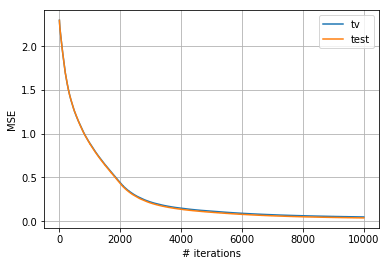

In [17]:
plt.plot(tv_mse, label='tv')
plt.plot(test_mse, label='test')
plt.legend()
plt.xlabel('# iterations')
plt.ylabel('MSE')
plt.grid()

In [18]:
print(tv_mse[-1], test_mse[-1])

0.0488243 0.0378804


**Important**: Compared to initializing weights and bias to 0, result: "0.691441 0.670476"
It demonstrates how crucial it is to initialize weights properly.

Also, compared to linear multinomial logisitic regression, non-linear 2-layer fc NN beats its performance by nearly one order of magnitude.